In [92]:
import numpy as np
from numpy import genfromtxt
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [93]:
data = genfromtxt(r"Delivery.csv",delimiter=',')

In [94]:
x_data = data[:,:-1]
y_data = data[:,-1]

In [95]:
lr = 0.0001
theta0 = 0
theta1 = 0
theta2 = 0

epochs = 1000
def compute_error(theta0,theta1,theta2,x_data,y_data):
    totalError = 0
    for i in range(0,len(x_data)):
        totalError += (y_data[i] - (theta1*x_data[i,0]+theta2*x_data[i,1] + theta0))**2
    return totalError/(float(len(x_data))*2)
    return totalError / float(len(x_data))                   

In [96]:
def gradient_descent_runner(x_data,y_data,theta0,theta1,theta2,lr,epochs):
    m = float(len(x_data))
    for i in range(epochs):
        theta0_grad = 0
        theta1_grad = 0
        theta2_grad = 0
        for j in range(0,len(x_data)):
            theta0_grad +=(1/m)*((theta1*x_data[j,0]+theta1*x_data[j,1]+theta0) - y_data[j])
            theta1_grad +=(1/m)*x_data[j,0]*((theta1 * x_data[j,0]+theta1*x_data[j,1]+theta0) - y_data[j])
            theta2_grad +=(1/m)*x_data[j,1]*((theta1 * x_data[j,0]+theta1*x_data[j,1]+theta0) - y_data[j])
        theta0 = theta0 -(lr*theta0_grad)
        theta1 = theta1 -(lr*theta1_grad)
        theta2 = theta2 -(lr*theta2_grad)
    return theta0,theta1,theta2

In [97]:
print("Starting theta0 = {0}, theta1 = {1}, theta2 = {2}, error = {3}".
      format(theta0, theta1, theta2, compute_error(theta0, theta1, theta2, x_data, y_data)))
theta0, theta1, theta2 = gradient_descent_runner(x_data, y_data, theta0, theta1, theta2, lr, epochs)
print("After {0} iterations theta0 = {1}, theta1 = {2}, theta2 = {3}, error = {4}".
      format(epochs, theta0, theta1, theta2, compute_error(theta0, theta1, theta2, x_data, y_data)))

Starting theta0 = 0, theta1 = 0, theta2 = 0, error = 23.639999999999997
After 1000 iterations theta0 = 0.006497287963180377, theta1 = 0.08007462583419962, theta2 = 0.0723248118362661, error = 0.3894865922755969


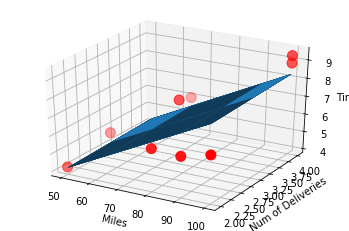

In [98]:
ax = plt.figure().add_subplot(111, projection = '3d') 
ax.scatter(x_data[:,0], x_data[:,1], y_data, c = 'r', marker = 'o', s = 100) #点为红色三角形  
x0 = x_data[:,0]
x1 = x_data[:,1]
# 生成网格矩阵
x0, x1 = np.meshgrid(x0, x1)
z = theta0 + x0*theta1 + x1*theta2
# 画3D图
ax.plot_surface(x0, x1, z)
#设置坐标轴  
ax.set_xlabel('Miles')  
ax.set_ylabel('Num of Deliveries')  
ax.set_zlabel('Time')  
  
#显示图像  
plt.show()  

In [99]:
#sklearn实现
import numpy as np
from numpy import genfromtxt
from sklearn import linear_model
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [100]:
data = genfromtxt(r"Delivery.csv",delimiter=',')
x_data=data[:,:-1]
y_data=data[:,-1]

In [101]:
model = linear_model.LinearRegression()
model.fit(x_data,y_data)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [102]:
print("coefficients:",model.coef_)#系数
print("intercept:",model.intercept_)#截距
x_test = [[1024,4]]
predict = model.predict(x_test)
print("predict:",predict)

coefficients: [0.0611346  0.92342537]
intercept: -0.8687014667817126
predict: [65.42682916]


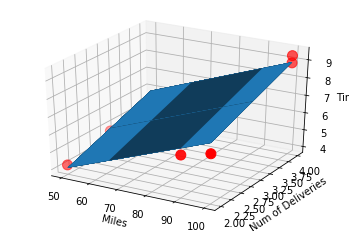

In [103]:
ax = plt.figure().add_subplot(111,projection = '3d')
ax.scatter(x_data[:,0],x_data[:,1],y_data,c="r",marker='o',s=100)#红色三角形
x0 = x_data[:,0]
x1 = x_data[:,1]
x0,x1 = np.meshgrid(x0,x1)
z = model.intercept_ + x0*model.coef_[0] + x1 *model.coef_[1]

ax.plot_surface(x0,x1,z)
ax.set_xlabel('Miles')
ax.set_ylabel('Num of Deliveries')
ax.set_zlabel('Time')

plt.show()